In [2]:
import numpy as np
import matplotlib.pyplot as plt

array([[15.73532186, 15.0072732 ],
       [15.0072732 , 18.04232943]])

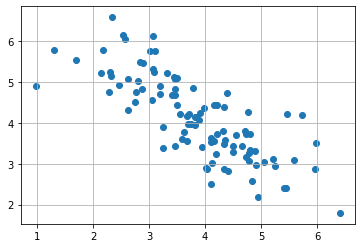

In [31]:
cov_true = np.array([1, -0.8, -0.8, 1]).reshape(2,2)
X = np.random.multivariate_normal(mean=[4,4], cov=cov_true, size=100)
plt.grid()
plt.scatter(X[:,0], X[:,1])
S = 1/100 * X.T.dot(X)
S

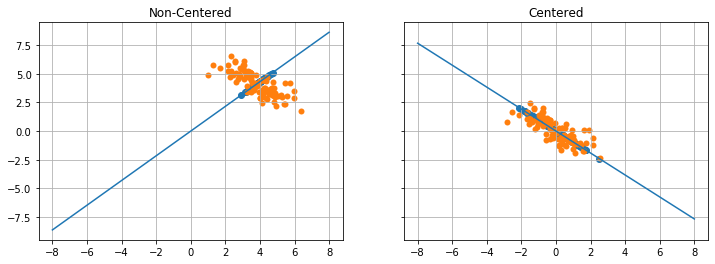

In [94]:
def project(X, v):
    proj = np.matmul(X, v)
    return np.array([v * proj[i] for i in range(len(X))])

def plot_pc(C, D, title, ax):
    e, v = np.linalg.eigh(C)
    pc = v[:, 1]
    m = pc[1] / pc[0]
    
#     if title == 'Non-Centered':
#         x = np.linspace(start=0, stop=7, num=100)
#     else:
#         x = np.linspace(start=-4, stop=4, num=100)
    x = np.linspace(-8, 8, 100)
    ax.plot(x, m*x)
    
    projected = project(D, pc)
    ax.scatter(projected[:,0], projected[:,1])
    ax.grid()
    ax.set_title(title)
    ax.scatter(D[:,0], D[:,1], marker='o', linewidth=.0001)
    
# project(X, v[:,1], 1)
fig, axs = plt.subplots(1, 2, figsize=(12, 4), sharex='all', sharey='all')
plot_pc(S, X, 'Non-Centered', axs[0])
X_c = X - np.mean(X, axis=0)
S_c = 1/100 * X_c.T.dot(X_c)
plot_pc(S_c, X_c, 'Centered', axs[1])
plt.savefig('Non-Centered.png')

In [1]:
x = X[0]
print(x)
print(np.dot(x, v[:,0])*v[:,0])
print(np.dot(x, v[:,0])*v[:,0] + np.dot(x, v[:,1])*v[:,1])

NameError: name 'X' is not defined

[0, 1, 2, 3, 4, 5, 6, 7, 8]